Enter the initial water saturation.363
Enter the residual oil saturation.205
Enter the number of saturations you want to plot100
Please enter the alpha 11
Please enter the alpha 2.78
Please enter the m2.56
Please enter the n3.72
Please enter the viscosity of oil2
Please enter the viscosity of water1


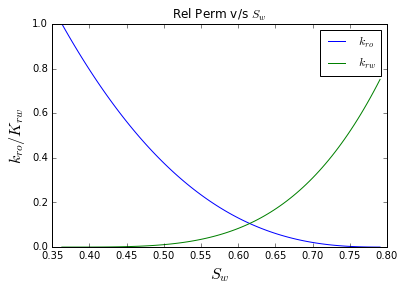

In [16]:
# Importing required libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import pandas as pd
from pandas import DataFrame 


# Requesting  Siw Initial Water Saturation  and Sor Residual Oil Saturation input
Siw_str = input('Enter the initial water saturation ')  # use default value of .363
Sor_str = input('Enter the residual oil saturation ')   # use default value of .205

# Converting to float
Siw = float(Siw_str)
Sor = float(Sor_str)

# Requesting input for No of Sw's for fw v/s Sw plot, the Sw grid resolution
no_of_sats_str = input("Enter the number of saturations you want to plot ")  #default =10000 for higher accuracy

# Convert to integer
no_of_sats = int(no_of_sats_str)

# Initializaing Swd, Sw,kro,krw,fw arrays 
Swd = np.empty([no_of_sats])
Sw = np.empty([no_of_sats])
kro = np.empty([no_of_sats])
krw = np.empty([no_of_sats])
fw = np.empty([no_of_sats])

# requesting input for alphas   
alpha_1_str = input("Please enter the alpha 1 ") # use default value of 1.0
alpha_2_str = input("Please enter the alpha 2 ") # use default value of .78

# Converting to float
alpha_1 = float(alpha_1_str)
alpha_2 = float(alpha_2_str)

# requesting input for alphas eq 3.143 & 3.144
m_str = input("Please enter the m") # use default value of 2.56
n_str = input("Please enter the n") # use default value of 3.72

# Converting to float
m = float(m_str)
n = float(n_str)

# requesting input for oil and water viscoity
mu_oil_str = input("Please enter the viscosity of oil ")  #default 2
mu_water_str = input("Please enter the viscosity of water ") #default 1

# Converting to Float
mu_oil = float(mu_oil_str)
mu_water = float(mu_water_str)

#Calculating fw and Sw array
for i in range(no_of_sats):
    Sw[0] = Siw    # Setting Siw as initial value of Sw
    increment_Sw = (1-Siw-Sor)/no_of_sats #Increment in Sw for plot
    Swd[i] = (Sw[i]-Siw)/(1-Sor-Siw)   # equation 3.111
    kro[i] = alpha_1*(1-Swd[i])**m   # equation 3.109 
    krw[i] = alpha_2*Swd[i]**n # equation 3.110
    fw[i]= 1/( 1 + (kro[i]*mu_water)/(krw[i]*mu_oil)) 
    if i < no_of_sats - 1 :
        Sw[i+1] = Sw[i] + increment_Sw

        
# plot rel perm curve        
plt.plot(Sw,kro, label='$k_{ro}$')
plt_krw = plt.plot(Sw,krw,label='$k_{rw}$')
plt.ylabel('$k_{ro}/K_{rw}$',fontsize = 16)
plt.xlabel('$S_w$',fontsize = 16)
plt.title('Rel Perm v/s $S_w$')
plt.legend()


The water front saturations is =  0.66108
The slope of tangent line is = 2.97641684671


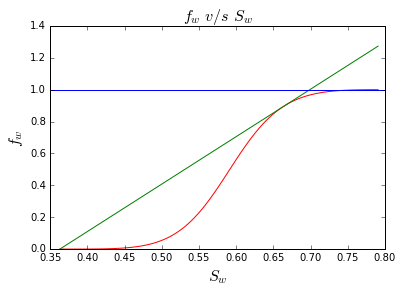

In [17]:
# Generate a plot of fw v/s Sw
fw_versus_Sw = plt.plot(Sw,fw,'r')
plt.xlabel('$S_w$',fontsize = 16)
plt.ylabel('$f_w$',fontsize = 16)
plt.title('$f_w$ $v/s$ $S_w$',fontsize = 16)

# calculating f'w
fw_dash = np.diff(fw)/np.diff(Sw)
b=[0]
# adding one element to make no of fw_dash= no_of_Sats
fw_dash = np.concatenate((fw_dash,b))

#initalizing slope of line array
slope_of_line = np.empty([no_of_sats])
len(slope_of_line)

#initializing y coordinate of line
y=np.empty([no_of_sats])

# calculating slope of line 
for i in range(no_of_sats):
    slope_of_line[i] = (fw[i]-fw[0])/(Sw[i]-Sw[0])

# criteria for matching the slope    
for i in range(len(fw_dash)-1,0,-1):
    if((slope_of_line[i] - fw_dash[i]) <= .0001):
        Swf = Sw[i]
        no_of_Swf = i
        print('The water front saturations is = ',Swf)
        m_line = slope_of_line[i]
        print('The slope of tangent line is =', slope_of_line[i])
        break
        
#calculating Sw_bar from interesction of tangent to fw and y=1
for i in range(no_of_sats):
    y[i] = m_line*Sw[i] - Siw*m_line

Sw_bar= (1 + (Siw*m_line))/m_line
Sw_bar

plt.plot(Sw,y,'g')
plt.axhline(y=1,)

In [20]:
dframe=pd.read_csv('streamtube.csv')
dframe.convert_objects(convert_numeric=True)

# for cell count in stream tube
cell_count = dframe.Cell_No.size

#dframe output chec
dframe

#sample column output
# dframe.Xi

E:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


,Cell_No,Xi,A,V_j,ratio_Vj_VT,G_J_1,G_J_2,G_J_3,G_J_4
0,0,0.50,0.12,0.00,0.000,0.000,0.000,0,0.000
1,1,52.78,12.90,340.31,0.030,17.372,17.880,19.62,36.582
2,2,74.64,18.24,680.62,0.050,1.506,1.558,1.696,2.920
3,3,91.41,22.34,1020.93,0.080,0.886,0.990,0.95,1.848
4,4,105.55,25.79,1361.24,0.100,0.631,0.639,0.67,1.197
5,5,118.01,28.84,1701.56,0.130,0.495,0.495,0.536,0.928
6,6,129.27,31.59,2041.87,0.150,0.397,0.397,0.44,0.768
7,7,139.63,34.12,2382.18,0.180,0.325,0.331,0.363,0.643
8,8,149.27,36.48,2722.49,0.200,0.286,0.282,0.306,0.535
9,9,158.33,38.69,3062.80,0.230,0.256,0.245,0.262,0.451


In [43]:
f_prime_sw = np.empty(cell_count+1)  
      
Qi_str = input('Please enter the no. of pore volumes injected ')
Qi = float(Qi_str)
import math
cell_with_swf = math.floor(m_line*Qi*cell_count) # using equation 4.57 m_line is f'swf

f_prime_sw[0] =0
#then calculate f'sw from equation 4.54
for j in range(1,cell_with_swf+1):
    f_prime_sw[j] = (dframe.ratio_Vj_VT[j])/Qi
print(j)    
for j in range(cell_with_swf,cell_count):
    f_prime_sw[j] =0
f_prime_sw

# water Saturation in streamtube cell
Sw_j=np.empty(cell_count)

# Finding Sw corresponding to fprime_sw or fw_dash 
for j in range(1,cell_with_swf+1):
    for i in range(no_of_Swf,no_of_sats):
        if (abs(fw_dash[i]-f_prime_sw[j]) <= .1):
            Sw_j[j]=Sw[i]
        
# Swj = 0 for cells ahead of waterfront                # then calculate S[w] for each J
for j in range(cell_with_swf,cell_count):
    Sw_j[j]= Siw


Please enter the no. of pore volumes injected .25
30


In [47]:
Sw_j

array([ 0.     ,  0.77772,  0.75612,  0.74316,  0.73452,  0.72588,
        0.72156,  0.71724,  0.71292,  0.7086 ,  0.70428,  0.69996,
        0.69996,  0.69564,  0.69132,  0.69132,  0.687  ,  0.68268,
        0.68268,  0.67836,  0.67836,  0.     ,  0.67404,  0.67404,
        0.66972,  0.66972,  0.     ,  0.6654 ,  0.6654 ,  0.66108,
        0.363  ,  0.363  ,  0.363  ,  0.363  ,  0.363  ,  0.363  ,
        0.363  ,  0.363  ,  0.363  ,  0.363  ,  0.363  ])

In [49]:
# displacement has to be advanced in time,
# before breakthrough first find out for a particular qi, find out which streamtube cell has Sw = Swf
# using in eqaution 4.57


def Saturations_in_Streamtube():
    f_prime_sw = np.empty(cell_count+1)  

    #Qi_str = input('Please enter the no. of pore volumes injected ')
    #Qi = float(Qi_str)
    import math
    cell_with_swf = math.floor(m_line*Qi*cell_count) # using equation 4.57 m_line is f'swf

    f_prime_sw[0] =0
    #then calculate f'sw from equation 4.54
    for j in range(1,cell_with_swf+1):
        f_prime_sw[j] = (dframe.ratio_Vj_VT[j])/Qi
    print(j)    
    for j in range(cell_with_swf,cell_count):
        f_prime_sw[j] =0
    f_prime_sw

    # water Saturation in streamtube cell
    Sw_j=np.empty(cell_count)

    # Finding Sw corresponding to fprime_sw or fw_dash 
    for j in range(1,cell_with_swf+1):
        for i in range(no_of_Swf,no_of_sats):
            if (abs(fw_dash[i]-f_prime_sw[j]) <= .1):
                Sw_j[j]=Sw[i]

    # Swj = 0 for cells ahead of waterfront                # then calculate S[w] for each J
    for j in range(cell_with_swf,cell_count):
        Sw_j[j]= Siw

# ** Section for relative permeability corresponsing Sw_j values which depend on Qi**        
# before breakthough equation 4.61
# we need lambda_ro_bar, lambda_rw_bar for individual streamtube cells

#kro_j and Krj_w rel perm for streamtube cell caclulation based on cell water saturation

    # initializing
    kro_j = np.empty(cell_count)
    krw_j = np.empty(cell_count)
    Swd_j = np.empty(cell_count)
    lambda_rw_j= np.empty(cell_count)
    lambda_ro_j= np.empty(cell_count)
    lambda_rw_j_bar = np.empty(cell_count)
    lambda_ro_j_bar = np.empty(cell_count)
    
    
    #kro_j and Krw_j for  Swf<Sw<1-Sor
    for j in range(1,cell_with_swf):
        Swd_j[j] = (Sw_j[j]-Siw)/(1-Sor-Siw)   # equation 3.111
        kro_j[j] = alpha_1*(1-Swd_j[j])**m     # equation 3.109 
        krw_j[j] = alpha_2*Swd_j[j]**n         # equation 3.110
    
    #kro and krw for cells ahead of breakthrough
    for j in range(cell_with_swf,cell_count):
        Swd_j[j] = (Siw-Siw)/(1-Sor-Siw)   # equation 3.111
        kro_j[j] = alpha_1*(1-Swd_j[j])**m   # equation 3.109 
        krw_j[j] = alpha_2*Swd_j[j]**n # equation 3.110
    #print('kro_j',kro_j)
    print('krw_j',krw_j)


#intializing lambda_ro_j array
    lambda_ro_j = np.empty(cell_count)
    
#lambda_ro_j for 1-Sor>Sw>Swf    to be used in equation 4.61

        
#lambda_ro_j and lambda_rw_j for 1-Sor>Sw>Swf        
    for j in range(cell_with_swf):
        lambda_ro_j[j] = (krw_j[j]/mu_oil)
        lambda_rw_j[j] = (krw_j[j]/mu_water)

#lambda_ro_j and lambda_rw_j for Sw<Swf    to be used in equation 4.61
    for j in range(cell_with_swf,cell_count):
        lambda_ro_j[j] =(kro_j[j]/mu_oil)
        lambda_rw_j[j] = (krw_j[j]/mu_water)
    #print('lambda_ro',lambda_ro_j)
    #print('lambda_rw',lambda_rw_j)
   
        

    
#lambda_ro_j_bar and lambda_rw_j for 1-Sor>Sw>Swf
    for j in range(cell_with_swf):
        lambda_ro_j_bar[j+1] =((lambda_ro_j[j+1])+(lambda_ro_j[j]))*.5    #4.52
        lambda_rw_j_bar[j+1] =((lambda_rw_j[j+1])+(lambda_rw_j[j]))*.5    #4.53
        
    print('lambda_rw_j_bar',lambda_rw_j_bar)
    print('lambda_ro_j_bar',lambda_ro_j_bar)
#total resitance in flooded portion
    sigma = 0
    for j in range(1,cell_with_swf):
        sigma = sigma + dframe.G_J[j]/(lambda_ro_j_bar[j] +lambda_rw_j_bar[j])
    resis_1 = 1/sigma
    
#total resitance in area ahead of water front flooded portion
    sigma = 0
    for j in range(cell_with_swf,cell_count):
        sigma = sigma + dframe.G_J[j]/lambda_ro_j[j]
    resis_2 = 1/sigma
    
    #print('resistance=',resis_1,resis_2)
    
    print('lambda_r_inv', 1/(lambda_rw_j_bar+lambda_ro_j_bar))
   

    
#relative perm corresponding to Sw_j    
        
    

      
    plt.plot(dframe.ratio_Vj_VT,Sw_j,label= 'Qi = %s'%(Qi)) #notice how to print the variable and text in legend 
    plt.legend()

    
def Saturations_in_Streamtube_abt():
#f_prime is f' in streamtube elements    
    f_prime_sw = np.empty(cell_count)  
      
    #Qi_str = input('Please enter the no. of pore volumes injected')
    #Qi = float(Qi_str)
    

#then calculate f'sw from equation 4.54
    for j in range(cell_count):
        f_prime_sw[j] = (dframe.ratio_Vj_VT[j])/Qi 
    print(f_prime_sw,'f_prime_sw')
    Sw_j=np.empty(cell_count)

# Finding Sw corresponding to fprime_sw or fw_dash 
    for j in range(cell_count):
        for i in range(no_of_Swf,no_of_sats):
            if (abs(fw_dash[i]-f_prime_sw[j]) <= .001):
                if((Sw[i])>Swf):
                    Sw_j[j]=Sw[i]


# ** Section for relative permeability corresponsing Sw_j values which depend on Q_inj**        
# before breakthough equation 4.61
# we need lambda_ro_bar, lambda_rw_bar for individual j's 

#kro_j and Kro_w

    #initializing
    kro_j = np.empty(cell_count)
    krw_j = np.empty(cell_count)
    Swd_j = np.empty(cell_count)
    lambda_rw_j= np.empty(cell_count)
    lambda_ro_j= np.empty(cell_count)
    lambda_rw_j_bar = np.empty(cell_count)
    lambda_ro_j_bar = np.empty(cell_count)
    
    
    #kro_j and Krw_j for 1-Sor>Sw>Swf
    for j in range(cell_count):
        Swd_j[j] = (Sw_j[j]-Siw)/(1-Sor-Siw)   # equation 3.111
        kro_j[j] = alpha_1*(1-Swd_j[j])**m   # equation 3.109 
        krw_j[j] = alpha_2*Swd_j[j]**n # equation 3.110

#intializing lambda_ro_j array
    lambda_ro_j = np.empty(cell_count)

        
#lambda_ro_j and lambda_rw_j       
    for j in range(cell_count):
        lambda_ro_j[j] = (krw_j[j]/mu_oil)
        lambda_rw_j[j] = (krw_j[j]/mu_water)

    
#lambda_ro_j_bar and lambda_rw_j 
    for j in range(cell_count-1):
        lambda_ro_j_bar[j+1] =((lambda_ro_j[j+1])+(lambda_ro_j[j]))*.5    #4.52
        lambda_rw_j_bar[j+1] =((lambda_rw_j[j+1])+(lambda_rw_j[j]))*.5    #4.53
        
    #print('lambda_rw_j_bar',lambda_rw_j_bar)
    #print('lambda_ro_j_bar',lambda_ro_j_bar)
    
#total resitance in flooded portion
    sigma = 0
    for j in range(cell_count):
        sigma = sigma + dframe.G_J[j]/(lambda_ro_j_bar[j] +lambda_rw_j_bar[j])
    resis_1 = 1/sigma
    
    
    #print('resistance=',resis_1,resis_2)
    
    print('lambda_r_inv', 1/(lambda_rw_j_bar+lambda_ro_j_bar))
  
    plt.plot(dframe.ratio_Vj_VT,Sw_j,label= 'Qi = %s'%(Qi)) #notice how to print the variable and text in legend 
    plt.legend()
                


In [ ]:
manual=input('Do you want to enter Water Saturation')

In [ ]:
Qi=.15
while Qi<=1/m_line:
    Saturations_in_Streamtube()
    Qi = Qi +.05

In [ ]:
if manual =='Yes':
    Qi=.2
    while Qi<=1/m_line:
        Saturations_in_Streamtube()
        Qi = Qi +.5
    while Qi<=.9:
        Saturations_in_Streamtube_abt()
        Qi = Qi +.5
        
    
# output high resoltuion jpeg
plt.savefig('destination_path.jpeg', format='jpeg', dpi=1000)


[ 0.          0.04545455  0.07575758  0.12121212  0.15151515  0.1969697
  0.22727273  0.27272727  0.3030303   0.34848485  0.37878788  0.41666667
  0.45454545  0.5         0.53030303  0.57575758  0.60606061  0.65151515
  0.68181818  0.72727273  0.75757576  0.8030303   0.83333333  0.87878788
  0.90909091  0.95454545  0.98484848  1.03030303  1.06060606  1.10606061
  1.13636364  1.18181818  1.21212121  1.25757576  1.28787879  1.33333333
  1.36363636  1.40909091  1.43939394  1.48484848  1.51515152] f_prime_sw
lambda_r_inv [ 1.25792999  0.9346956   1.06265616  1.13578246  1.20090881  1.25594499
  1.30798334  1.35475546  1.40002266  1.44206841  1.48270083  1.51740085
  1.55487285  1.59454334  1.62981466  1.66374358  1.69753868  1.72977965
  1.76169066  1.79264389  1.8231183   1.85290497  1.88294773  1.912222
  1.94078763  1.96891626  1.9971585   2.02443608  2.05175513  2.07900234
  2.10576391  2.1318985   2.15849259  2.18442098  2.21025409  2.23589843
  2.26141385  2.28670692  2.31183655  2.3

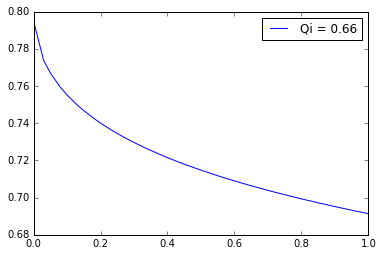

In [203]:
Qi=.66
while Qi<=.66:
    Saturations_in_Streamtube_abt()
    Qi = Qi +.05

In [173]:
dframe.G_J

0      0.00
1     19.07
2      1.42
3      0.83
4      0.59
5      0.46
6      0.37
7      0.32
8      0.27
9      0.24
10     0.22
11     0.20
12     0.18
13     0.16
14     0.15
15     0.14
16     0.13
17     0.12
18     0.12
19     0.11
20     0.11
21     0.11
22     0.11
23     0.12
24     0.12
25     0.13
26     0.14
27     0.15
28     0.16
29     0.18
30     0.20
31     0.22
32     0.24
33     0.27
34     0.32
35     0.37
36     0.46
37     0.59
38     0.83
39     1.42
40    19.07
Name: G_J, dtype: float64

In [16]:



#apparent viscosity for 1-Sor>Sw>Swf    
for i in range(no_of_Swf,no_of_sats):
    vis_ap[i] = 1/((kro[i]/mu_oil) + (krw[i]/mu_water))



IndentationError: unexpected indent (<ipython-input-16-e95bc49db947>, line 4)

In [18]:
Sw_j

NameError: name 'Sw_j' is not defined

In [57]:
1/m_line

0.33587767977610578

In [ ]:
(Sw_j.mean() -Siw)

In [ ]:
#initializing Apparent Viscosity Array
vis_ap =np.empty(no_of_sats)

In [ ]:
#apparent viscosity for Sw<Swf    to be used in equation 4.61
vis_ap_ro = 1/((kro[0]/mu_oil))
print(vis_ap_ro) 

#apparent viscosity for 1-Sor>Sw>Swf    
for i in range(no_of_Swf,no_of_sats):
    vis_ap[i] = 1/((kro[i]/mu_oil) + (krw[i]/mu_water))


In [ ]:
# apparent viscosity calcualtion for breakthrough Swf using trapezoidal method
# -ve sign is to compensate for limits of intergration from  f'sw2(swf in this case for breakthrough) to zero instead of zero to
# f'sw2
-np.trapz(vis_ap[no_of_Swf:],fw_dash[no_of_Swf:])/fw_dash[no_of_Swf]


#use this to calculate q@breakthrough from equation 3.125

In [ ]:
plt.plot(fw_dash[no_of_Swf:],vis_ap[no_of_Swf:])
plt.xlabel("$f'_{Sw}$",fontsize=16)
plt.ylabel(r"$\lambda$$^{-1}$",fontsize=16)
plt.title(r"$\lambda$$^{-1}$ $v/s$ $f'_{Sw}$" ,fontsize=16)


In [ ]:
#initializing Q_inj, Apparent Viscoisty and Sw2 Arrays
Q_inj=np.empty(no_of_sats)
apvis=np.empty(no_of_sats)
Sw2=np.empty(no_of_sats)



In [ ]:
#calculating apvis for various all Sw>Swf
for i in range(no_of_Swf+1,no_of_sats):
    Sw2[i]=Sw[i]
    Q_inj[i]=1/fw_dash[i]
    apvis[i]=-np.trapz(vis_ap[i:],fw_dash[i:])/fw_dash[i]

In [ ]:
#creating a dataframe of f'sw , apvis, Sw2, Q_inj
d = {"f'sw":fw_dash[no_of_Swf+1:], 'Apvis':apvis[no_of_Swf+1:],'Q_inj': Q_inj[no_of_Swf+1:]}
df = pd.DataFrame(data=d,index = Sw2[no_of_Swf+1:])
df.index.name = 'Sw2'

In [ ]:
#increasing display of maximum no of rows displayed in Dataframe
pd.set_option('display.max_rows', 2000)
df

In [ ]:
#just a check
plt.plot(Sw2[no_of_Swf+1:],apvis[no_of_Swf+1:])